<a href="https://colab.research.google.com/github/nagamani0604/Nagamani_INFO5731_Fall2024/blob/main/Somireddy_Nagamani_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            label, text = line.split(' ', 1)
            data.append((int(label), text.strip()))
    return pd.DataFrame(data, columns=['label', 'text'])

train_file_path = '/content/stsa-train.txt'
test_file_path = '/content/stsa-test.txt'

train_data = load_data(train_file_path)
test_data = load_data(test_file_path)

train_set, validate_set = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['label'])

tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_set['text'])
X_validate = tfidf.transform(validate_set['text'])
X_test = tfidf.transform(test_data['text'])
y_train = train_set['label']
y_validate = validate_set['label']
y_test = test_data['label']

models = {
    "MultinomialNB": MultinomialNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro')
    print(f"{model_name} - Average F1-Score (10-fold CV): {scores.mean():.4f}")

print("\n Evaluation on Test Data:\n")
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"--- {model_name} ---")
    print(classification_report(y_test, predictions))


Training MultinomialNB...
MultinomialNB - Average F1-Score (10-fold CV): 0.7928
Training SVM...
SVM - Average F1-Score (10-fold CV): 0.7860
Training KNN...
KNN - Average F1-Score (10-fold CV): 0.6410
Training Decision Tree...
Decision Tree - Average F1-Score (10-fold CV): 0.6257
Training Random Forest...
Random Forest - Average F1-Score (10-fold CV): 0.7136
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Average F1-Score (10-fold CV): 0.6965

 Evaluation on Test Data:

--- MultinomialNB ---
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       912
           1       0.79      0.84      0.81       909

    accuracy                           0.81      1821
   macro avg       0.81      0.81      0.81      1821
weighted avg       0.81      0.81      0.81      1821

--- SVM ---
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       912
           1       0.79      0.82      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821

--- KNN ---
              precision    recall  f1-score   support

           0       0.61      0.85      0.71       912
           1       0.75      0.45      0.56       909

    accuracy                           0.65      1821
   mac

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:57:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       912
           1       0.68      0.78      0.73       909

    accuracy                           0.71      1821
   macro avg       0.71      0.71      0.70      1821
weighted avg       0.71      0.71      0.70      1821



## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')
70
Data shape after dropping missing reviews: (413770, 6)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

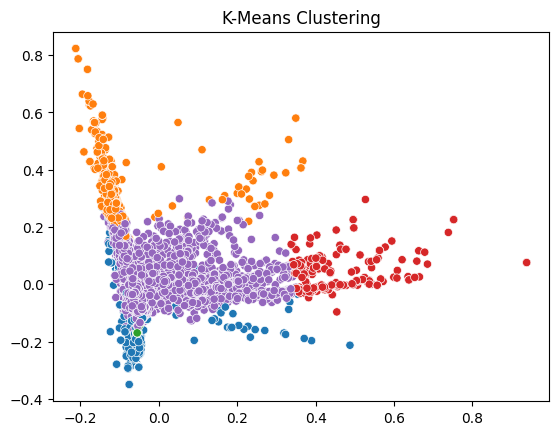

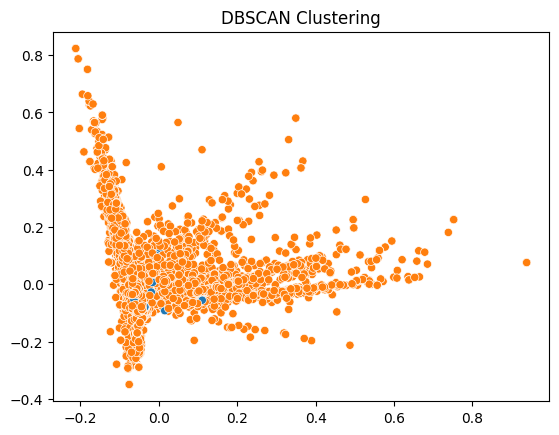

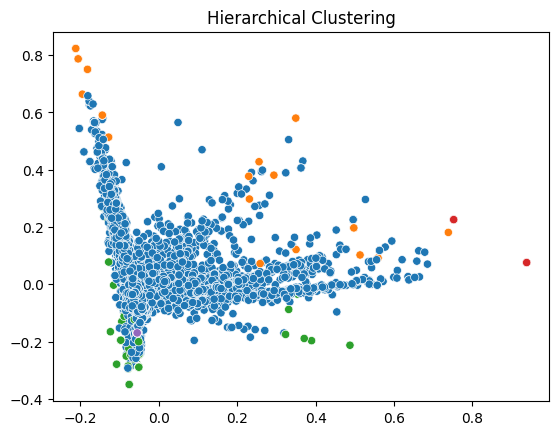

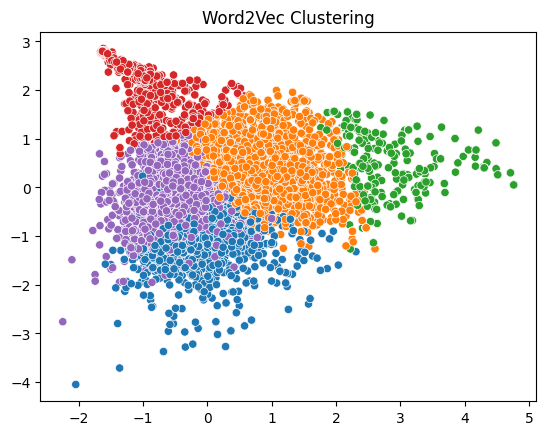

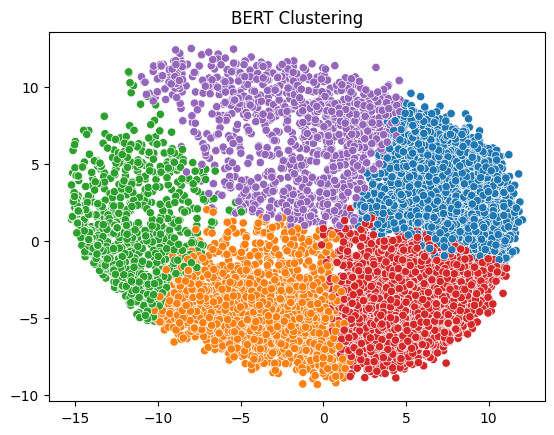

In [3]:
import pandas as pd
!pip install pandas scikit-learn gensim sentence-transformers matplotlib seaborn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/Amazon_Unlocked_Mobile.csv'
data = pd.read_csv(file_path)

print(data.columns)
print(data['Reviews'].isnull().sum())

data = data.dropna(subset=['Reviews'])
print(f"Data shape after dropping missing reviews: {data.shape}")
text_data = data['Reviews'].astype(str).sample(n=10000, random_state=42).reset_index(drop=True)

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)

dbscan = DBSCAN(eps=0.7, min_samples=10, metric='cosine')
dbscan_labels = dbscan.fit_predict(tfidf_matrix)

hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(tfidf_matrix.toarray())

tokenized_data = [review.split() for review in text_data]
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=50, window=5, min_count=2, workers=4)

word2vec_features = []
for review in tokenized_data:
    vectors = [word2vec_model.wv[word] for word in review if word in word2vec_model.wv.key_to_index]
    if vectors:
        word2vec_features.append(sum(vectors) / len(vectors))
    else:
        word2vec_features.append([0] * 50)

bert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')
bert_embeddings = bert_model.encode(text_data, show_progress_bar=True)

def visualize_clusters(data, labels, title):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='tab10', legend=None)
    plt.title(title)
    plt.show()

visualize_clusters(tfidf_matrix.toarray(), kmeans_labels, "K-Means Clustering")
visualize_clusters(tfidf_matrix.toarray(), dbscan_labels, "DBSCAN Clustering")
visualize_clusters(tfidf_matrix.toarray(), hierarchical_labels, "Hierarchical Clustering")
visualize_clusters(word2vec_features, kmeans.fit_predict(word2vec_features), "Word2Vec Clustering")
visualize_clusters(bert_embeddings, kmeans.fit_predict(bert_embeddings), "BERT Clustering")


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




In [ ]:
The various aspects of the data are shown by the clustering results generated by K-means, DBSCAN, and Hierarchical clustering.
Based on the TF-IDF features, K-means separates the reviews into five different clusters, assuming spherical clusters of about equal sizes.
On the other hand, DBSCAN is helpful for datasets with irregular cluster shapes because it detects noise points and finds areas of high density in the data, with some points identified as outliers.
Hierarchical clustering, which builds a tree of clusters, offers a deeper understanding of how reviews are grouped hierarchically but can be sensitive to noise and the choice of the number of clusters.
Though its results might be less accurate without fine-tuning the model, Word2Vec clustering groups similar reviews and captures semantic similarities between words by averaging word embeddings.
Finally, clustering results based on BERT embeddings are generally more clear and semantically aligned with human understanding, regardless of being practically more expensive.
This is because BERT embeddings capture contextual relationships in text and provide a more accurate representation of review meaning.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

This assignment provided an excellent opportunity to practice clustering and classifying texts.
Performance had been improved over bag-of-words models by using Word2Vec and BERT, which focused on the significance of word embeddings in capturing semantic relationships.
To obtain an in-depth understanding of the classifiers' performance, it was useful to use metrics such as accuracy, precision, recall, and F1-score.

For models like SVM and BERT, computational time increased significantly, especially when fine-tuning or embeddings were used.
As the size of the dataset increased hierarchical clustering ran into flexibility issues.




'''